条形图、箱线图和点图
饼图和扇形图
直方图与核密度图

# 6.1 条形图

条形图通过垂直的或水平的条形展示了类别型变量的分布（频数）。函数barplot()的最简单用法是：

barplot(height)

height是一个向量或一个矩阵。

In [1]:
install.packages("vcd")

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpy4MJ06\downloaded_packages


In [2]:
#在关节炎研究中，变量Improved记录了对美味接受了安慰剂或药物治疗的病人的治疗结果
library(vcd)
counts <- table(Arthritis$Improved) #i#使用table()函数将其表格化
counts
#可以看到，28为病人有了明显改善，14人有部分改善，而42人没有改善。

Loading required package: grid



  None   Some Marked 
    42     14     28 

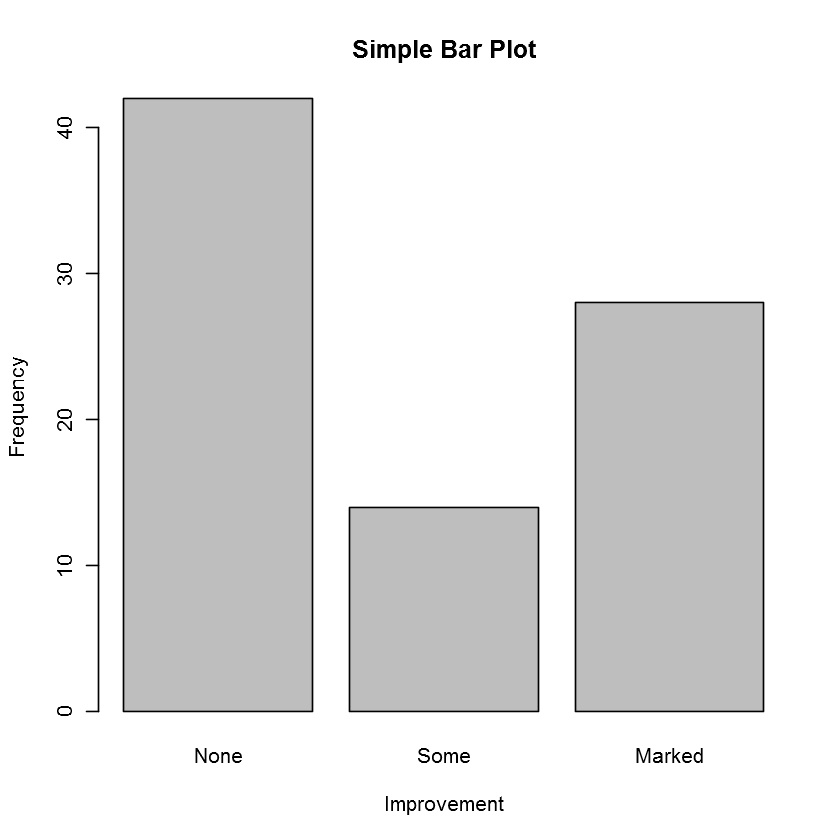

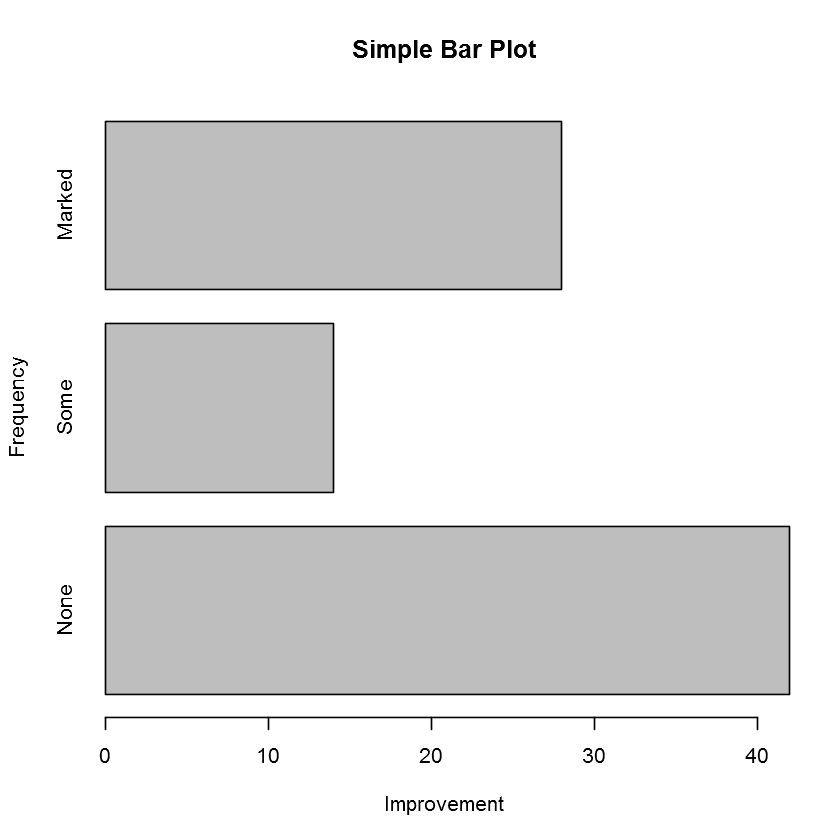

In [3]:
#简单的条形图
barplot(counts,
       main = "Simple Bar Plot",
       xlab="Improvement",
       ylab="Frequency") #简单条形图
barplot(counts,
       main = "Simple Bar Plot",
       xlab="Improvement",
       ylab="Frequency",
       horiz=TRUE) #水平条形图

![生成因素变量的条形图.jpg](./image/生成因素变量的条形图.jpg)

## 6.1.2  堆砌条形图和分组条形图

如果height是一个矩阵而不是一个向量，则绘图结果将是一幅堆砌条形图或分组条形图。若beside=FALSE（默认值），则矩阵中的每一列都将生成图中的一个条形，各列中的值将给出；堆砌的“子条”的高度。若beside=TRUE，则矩阵中的每一列都表示一个分组，各列中的值将并列而不是堆砌。

In [4]:
library(vcd)
counts <- table(Arthritis$Improved, Arthritis$Treatment)
counts

        
         Placebo Treated
  None        29      13
  Some         7       7
  Marked       7      21

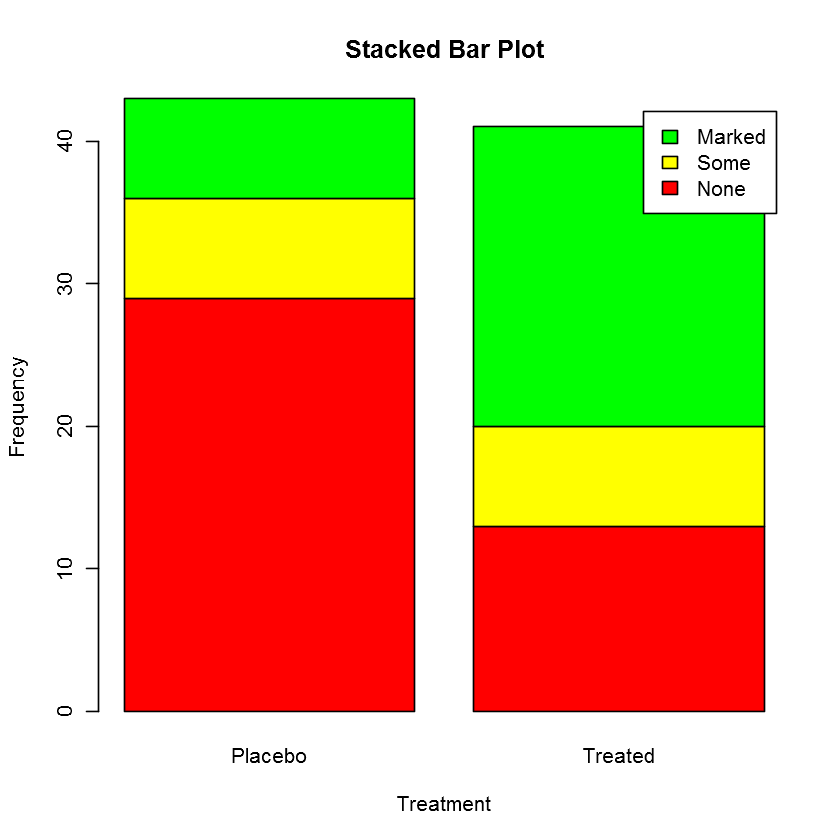

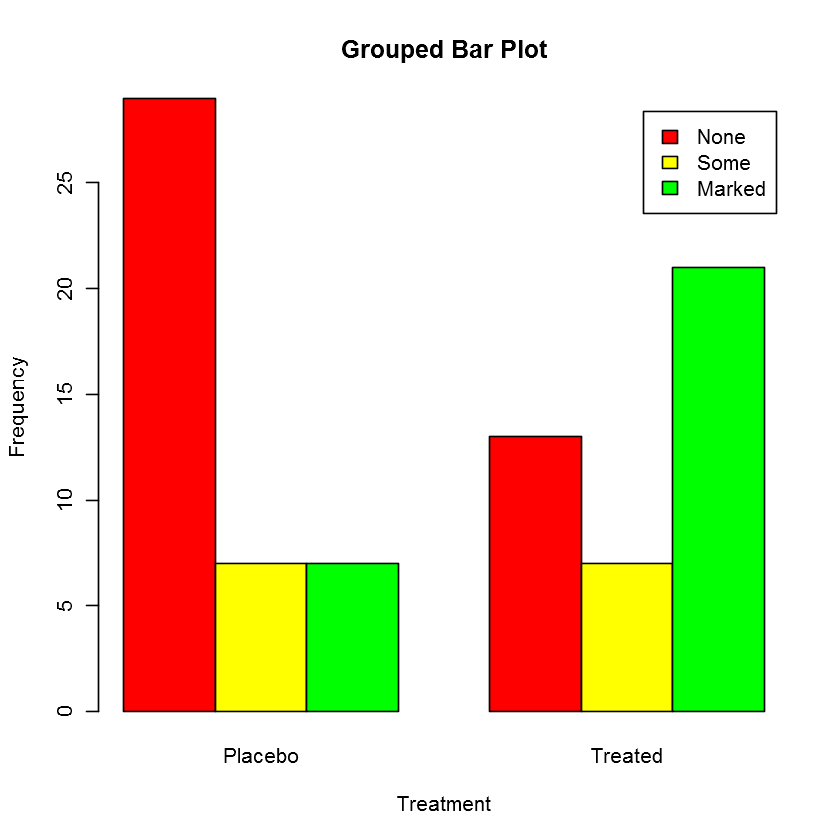

In [5]:
#堆砌条形图
barplot(counts,
        main="Stacked Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow","green"),
        legend=rownames(counts))

#分组条形图
barplot(counts,
        main="Grouped Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow", "green"),
        legend=rownames(counts), beside=TRUE)

## 6.1.3 均值条形图

条形图并不一定要基于技术数据 或频率数据。可以使用数据整合函数并将结果传递给barplot()函数，来创建表示均值、中位数、标准差等的条形图。

In [6]:
states <- data.frame(state.region, state.x77)
means <- aggregate(states$Illiteracy,by=list(state.region),FUN=mean)
means

Group.1,x
Northeast,1.000000
South,1.737500
North Central,0.700000
West,1.023077


In [7]:
means <- means[order(means$x),]  #将均值从小到大排序
means

,Group.1,x
3,North Central,0.700000
1,Northeast,1.000000
4,West,1.023077
2,South,1.737500


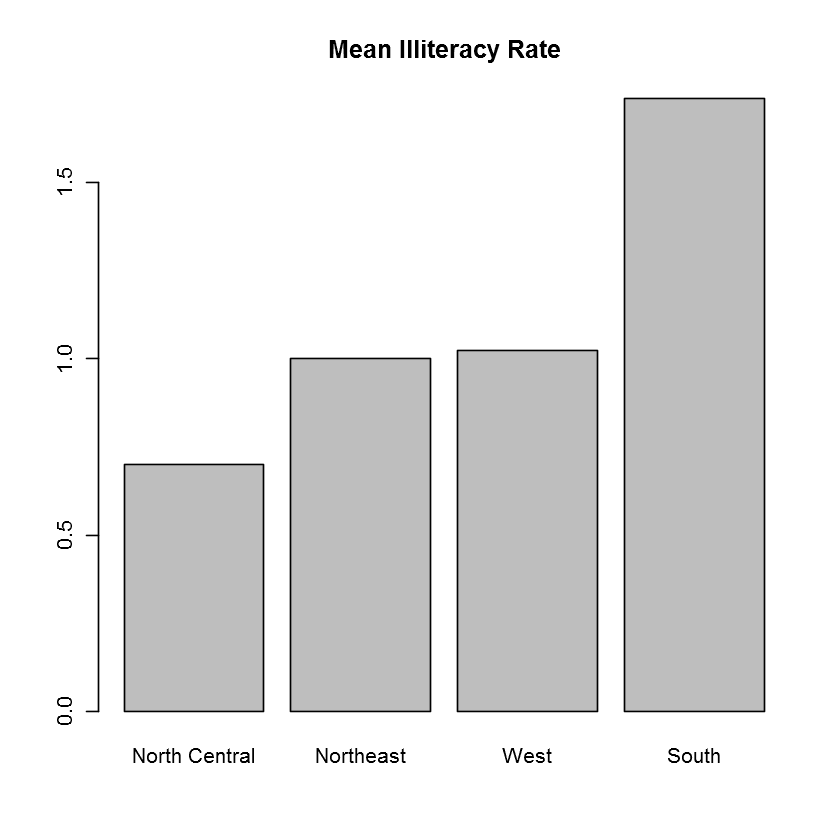

In [8]:
barplot(means$x,names.arg=means$Group.1)
title("Mean Illiteracy Rate") #添加标题

## 6.1.4 条形图的微调

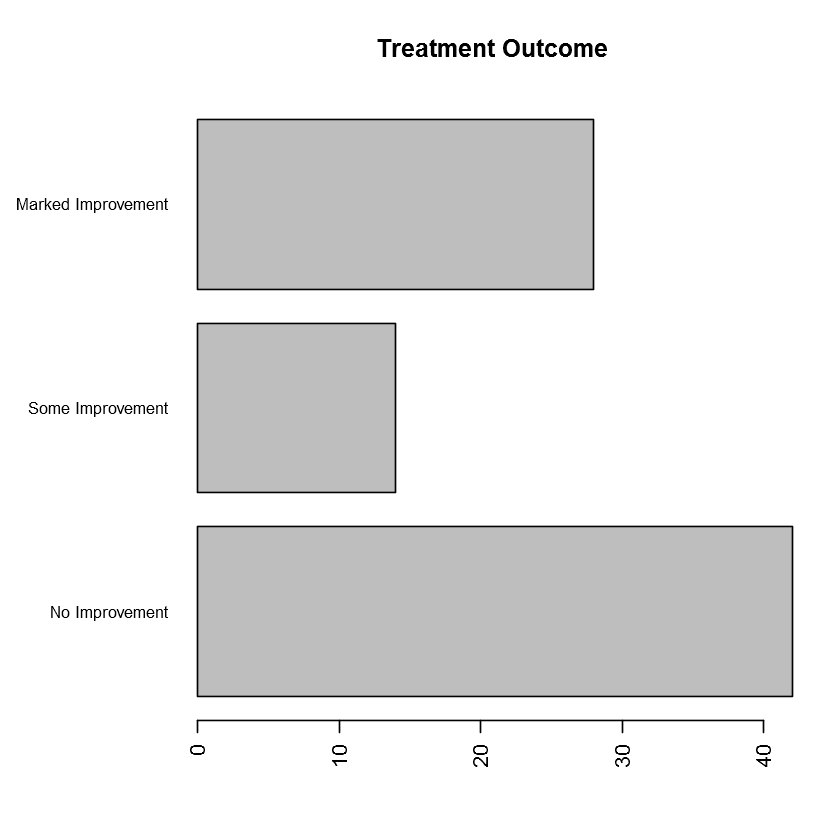

In [9]:
#为条形图搭配标签
par(mar=c(5,8,4,2)) #增加y边界的大小
par(las=2)  #旋转条形的标签
counts <- table(Arthritis$Improved)
barplot(counts,
       main = "Treatment Outcome",
       horiz = TRUE,
       cex.names = 0.8,  #缩小字体大小，让标签更合适
       names.arg=c("No Improvement", "Some Improvement",
                  "Marked Improvement"))  #修改标签文本
#par()函数能够让你对R的默认图形做出大量修改

## 6.1.5 棘状图

棘状图对堆砌条形图进行了重缩放，这样每个条形的高度均为1，每一段的高度即表示比例。

棘状图可由vcd包中的函数spine()绘制。

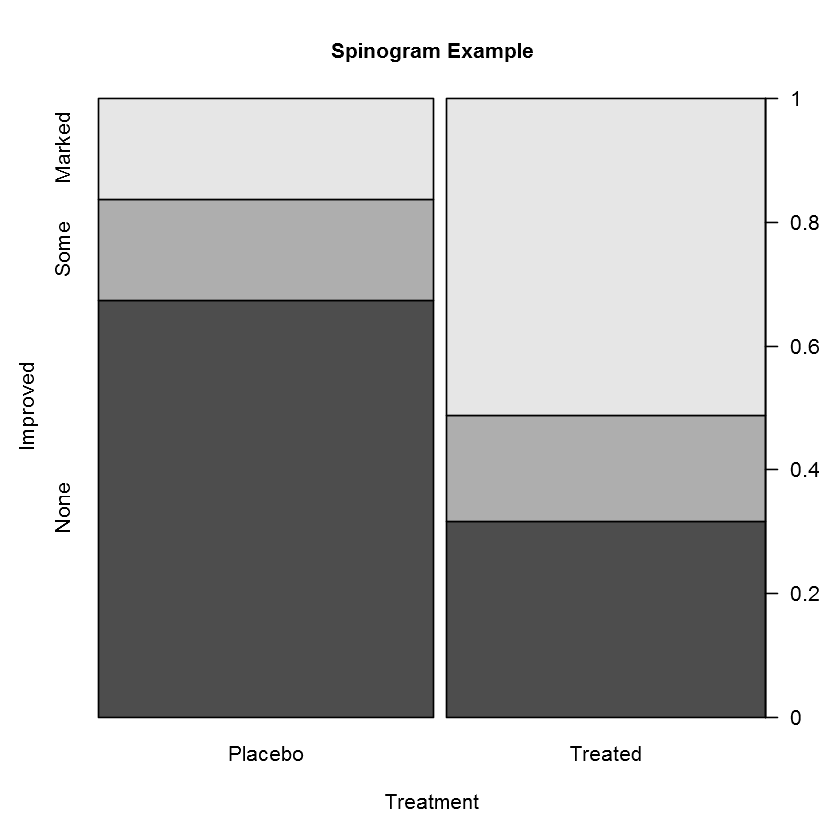

In [10]:
library(vcd)
attach(Arthritis)
counts <- table(Treatment, Improved)
spine(counts, main="Spinogram Example")
detach(Arthritis)

# 6.2 饼图

饼图可由以下函数创建：

pie(x, labels)

x是一个非负数值向量，表示每个扇形的面积，而labels则是表示各扇形标签的字符型向量。

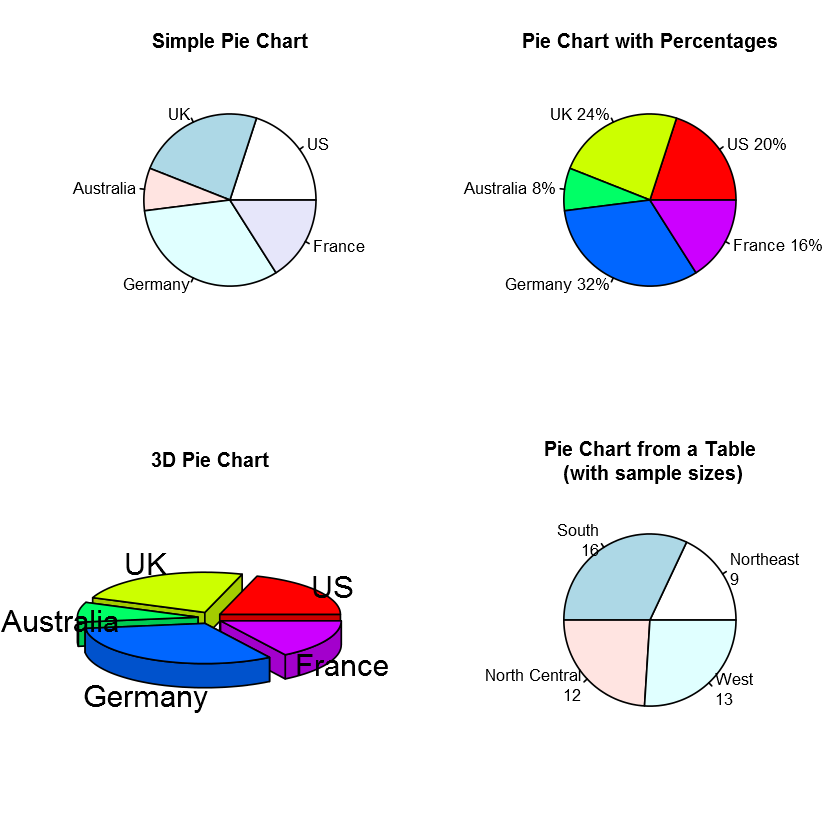

In [14]:
par(mfrow=c(2,2))  #将四幅图组合为一幅
slices <- c(10,12, 4, 16, 8)
lbls <- c("US","UK","Australia","Germany", "France")
pie(slices,labels= lbls,
   main = "Simple Pie Chart")

#为饼图添加比例数值
pct <- round(slices/sum(slices)*100)
lbls2 <- paste(lbls, " ", pct, "%" , sep="")
pie(slices, labels = lbls2, col = rainbow(length(lbls2)),
   main = "Pie Chart with Percentages")

library(plotrix)
pie3D(slices,labels=lbls, explode=0.1,
     main= "3D Pie Chart")
mytable <- table(state.region)  #从表格创建饼图
lbls3 <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels=lbls3,
   main= "Pie Chart from a Table\n (with sample sizes)")

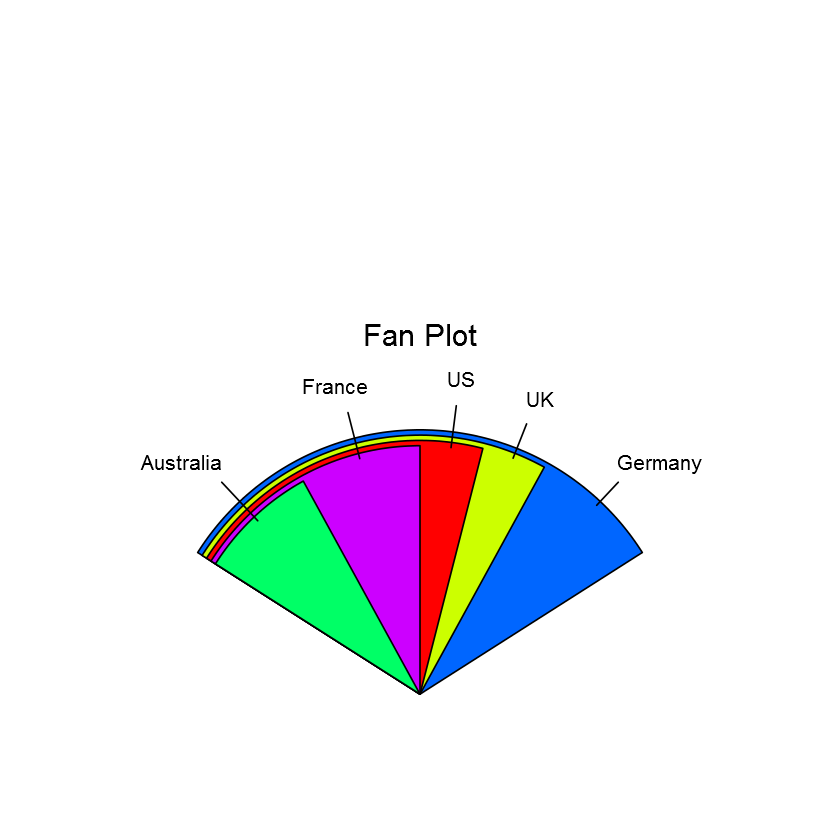

In [16]:
#。扇形图提供了一种同时展示相对数量和相互差异的方法
library(plotrix)
slices <- c(10,12,4,16,8)
lbl <- c("US", "UK", "Australia", "germany", "France")
fan.plot(slices, labels =lbls, main="Fan Plot")

# 6.3 直方图

直方图通过在x轴上将值域分割为一定数量的组，在y轴上显示相应值的频数，展示了连续型
变量的分布。可以使用如下函数创建直方图：

hist(x)

x是一个由数据值组成的数值向量。

参数freq=FALSE表示根据概率密度而不是频数绘制图形。

参数breaks用于控制组的数量。

在定义直方图中的单元时，默认将生成等距切分。

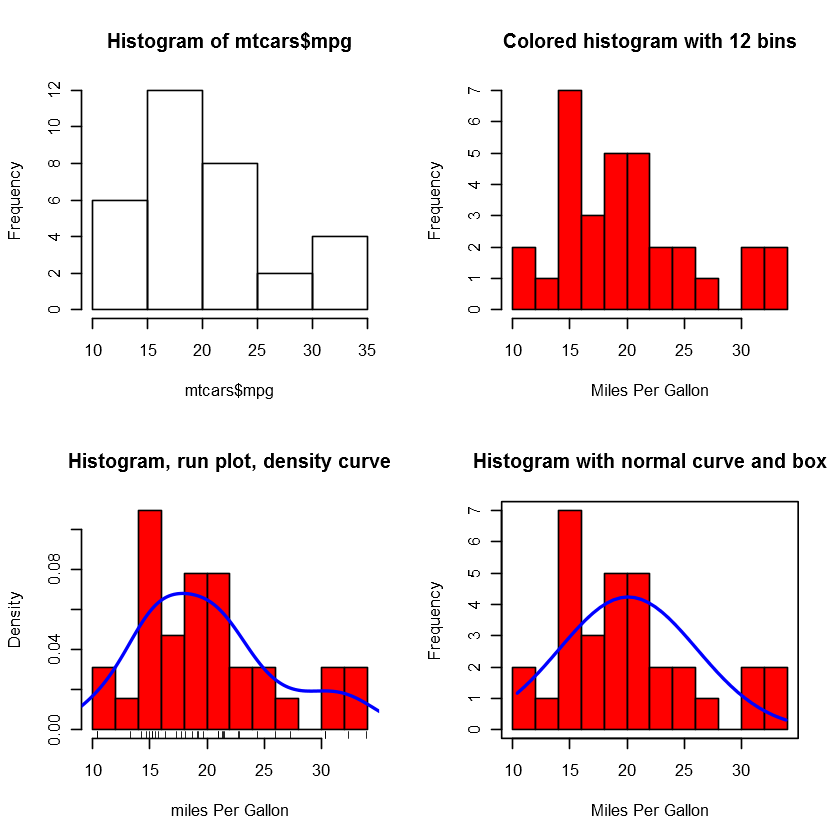

In [23]:
#直方图
par(mfrow=c(2,2))

#简单直方图
hist(mtcars$mpg)  #未指定任何选项时的默认图形，共创建了五个组，默认的标题和坐标轴标签

#指定组数和颜色
hist(mtcars$mpg, 
    breaks=12, #组数指定为12
    col="red",  #使用红色填充条形
     xlab="Miles Per Gallon",
     main="Colored histogram with 12 bins")  #添加了更吸引人、更具信息量的标签和标题

#添加轴须图
hist(mtcars$mpg,
    freq=FALSE,
    breaks=12,col="red",
    xlab = "miles Per Gallon",
    main="Histogram, run plot, density curve")
rug(jitter(mtcars$mpg)) 
#rug(jitter(mtcars$mpag, amount=0.01)) #将向每个数据点添加一个小的随机值（一个±amount之间的均匀分布随机数），以避免重叠的点产生影响
lines(density(mtcars$mpg),col="blue",lwd=2) #叠加了一条密度曲线（核密度估计）和轴须图（rug plot）
#使用lines()函数叠加了这条蓝色、双倍默认线条宽度的密度曲线


#添加正态密度曲线和外框
x <- mtcars$mpg
h <- hist(x,
         breaks=12,
         col="red",
         xlab="Miles Per Gallon",
         main="Histogram with normal curve and box")
xfit <- seq(min(x), max(x), length=40)
yfit <- dnorm(xfit,mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2]*length(x))
lines(xfit,yfit,col="blue",lwd=2)  #拥有一条叠加在上面的正态曲线
box() #一个将图形围绕起来的盒型


# 6.4 核密度图

核密度估计是用于估计随机变量概率密度函数的一种非参数方法。用来观察连续型变量分布的有效方法。

绘制密度图的方法（不叠加到另一幅图上方）为：

plot(density(x))

x是一个数值型向量。

由于plot()函数会创建一幅新的图形，所以要向一幅已经存在的图形上叠加一条密度曲线，可以使用lines()函数。

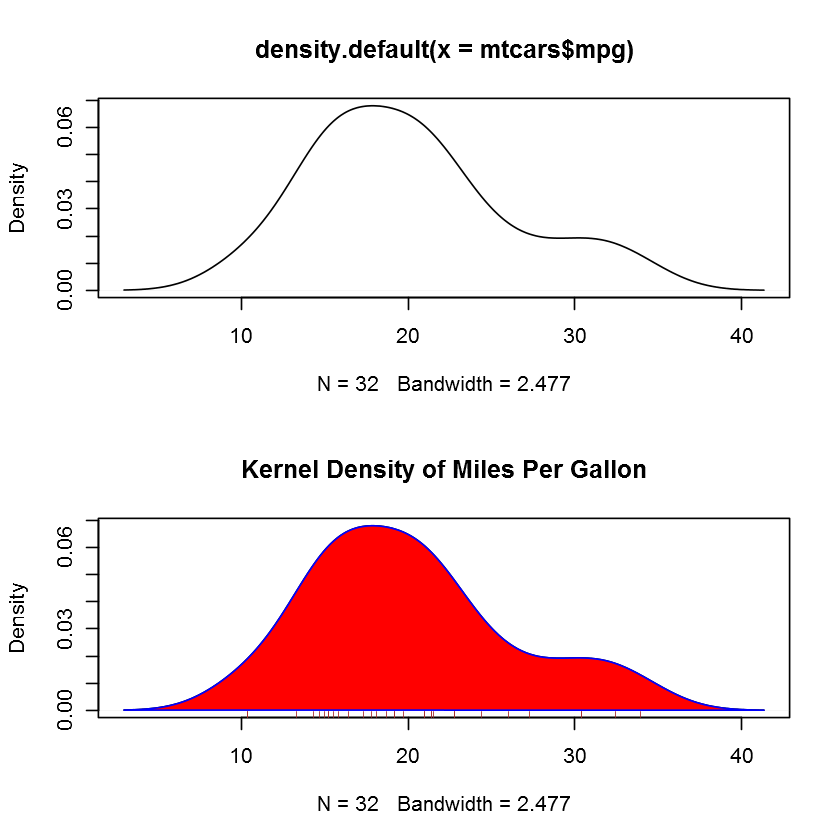

In [27]:
# 核密度图
par(mfrow=c(2,1))
d <- density(mtcars$mpg)

#完全使用默认设置创建最简图形
plot(d)


d <- density(mtcars$mpg)
plot(d,main="Kernel Density of Miles Per Gallon")  #添加一个标题
polygon(d,col="red",border="blue") #将曲线修改为蓝色，并使用实心红色填充曲线下方的区域
rug(mtcars$mpg,col="brown") #添加棕色的轴须图

polygon()函数根据顶点的x和y坐标（本例中由density()函数提供）绘制了多边形。

核密度图可用于比较组间差异。但需要用sm包。

使用sm包中的sm.density.compare()函数可向图形叠加两组或更多的核密度图。使用格式为：

sm.density.compare(x, factor)

x是一个数值型向量，

factor是一个分组变量。


The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



ERROR: Error in legend(locator(1), levels(cyl.f), fill = colfill): invalid coordinate lengths


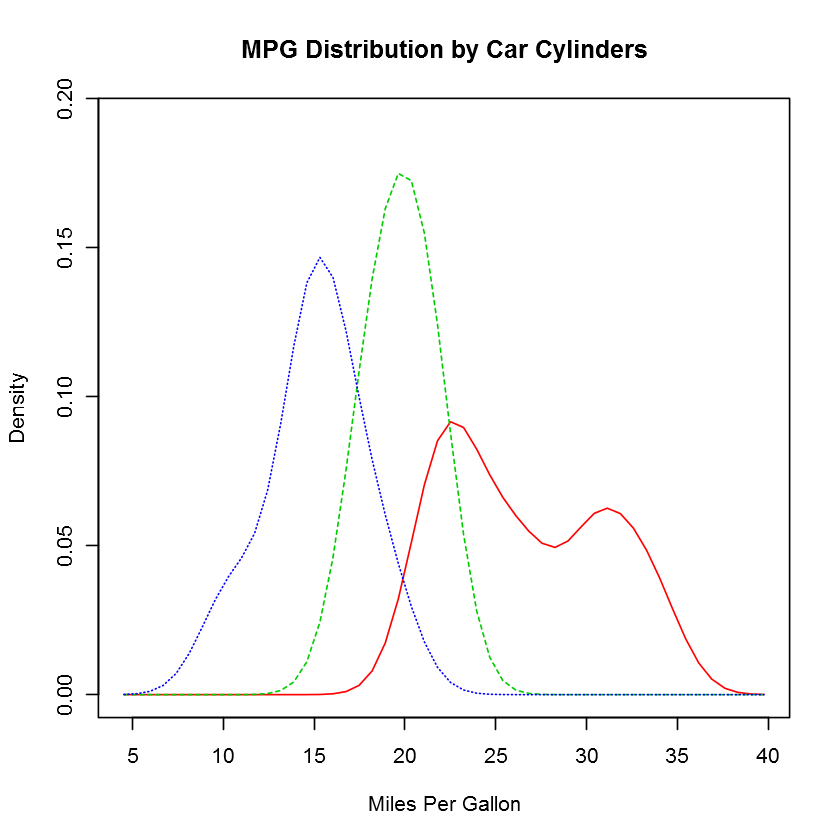

In [37]:
#install.packages("sm")

library(sm)
attach(mtcars)

#创建分组因子
cyl.f <- factor(cyl, levels = c(4,6,8),
               labels =c("4 cylinder", "6 cylinder",
                        "8 cylinder"))

#绘制密度图
sm.density.compare(mpg,cyl, xlab="Miles Per Gallon")
title(main="MPG Distribution by Car Cylinders")

#通过鼠标单击添加图例
colfill <- c(2:(1+length(levels(cyl.f))))

legend(locator(1), levels(cyl.f), fill=colfill)

detach(mtcars)